## Installing package

In [13]:
!pip install -e ../

Obtaining file:///Users/khalilno/.Trash/sc309
  Found existing installation: poetrytest-package 0.1.0
    Can't uninstall 'poetrytest-package'. No files were found to uninstall.
  Running setup.py develop for poetrytest-package
    Complete output from command /Users/jesseejh/anaconda3/bin/python -c "import setuptools, tokenize;__file__='/Users/khalilno/.Trash/sc309/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" develop --no-deps:
    running develop
    error: can't create or remove files in install directory
    
    The following error occurred while trying to add or remove files in the
    installation directory:
    
        [Errno 13] Permission denied: '/Users/jesseejh/anaconda3/lib/python3.7/site-packages/test-easy-install-23851.write-test'
    
    The installation directory you specified (via --install-dir, --prefix, or
    the distutils default setting) was:
    
        /Users/jessee

In [2]:
from sc309 import scanpy_workflow

In [3]:
import scanpy as sc

In [4]:
sc.settings.verbosity = 3
sc.logging.print_versions()

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.4 scipy==1.3.3 pandas==0.25.3 scikit-learn==0.20.3 statsmodels==0.10.2


## First, import your single cell data from a text file

In [5]:
#gzip -d is the same as gunzip, but works on Windows

!gzip -d ../Kidney_allo_rejection_python_input.txt.gz
adata = sc.read_text(
    '../Kidney_allo_rejection_python_input.txt')  # the directory with the `.mtx` file
    # use gene symbols for the variable names (variables-axis index)
#Github cannot handle large files, so zipping compresses the large file.
!gzip ../Kidney_allo_rejection_python_input.txt

In [6]:
adata

AnnData object with n_obs × n_vars = 4487 × 20477 

In [23]:
str(type(adata))

"<class 'anndata.core.anndata.AnnData'>"

In [24]:
assert(str(type(adata)) == "<class 'anndata.core.anndata.AnnData'>")

In [15]:
assert(2 == 2)

## You can use scanpy to look at the top genes to make sure that your data has been imported correctly

normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


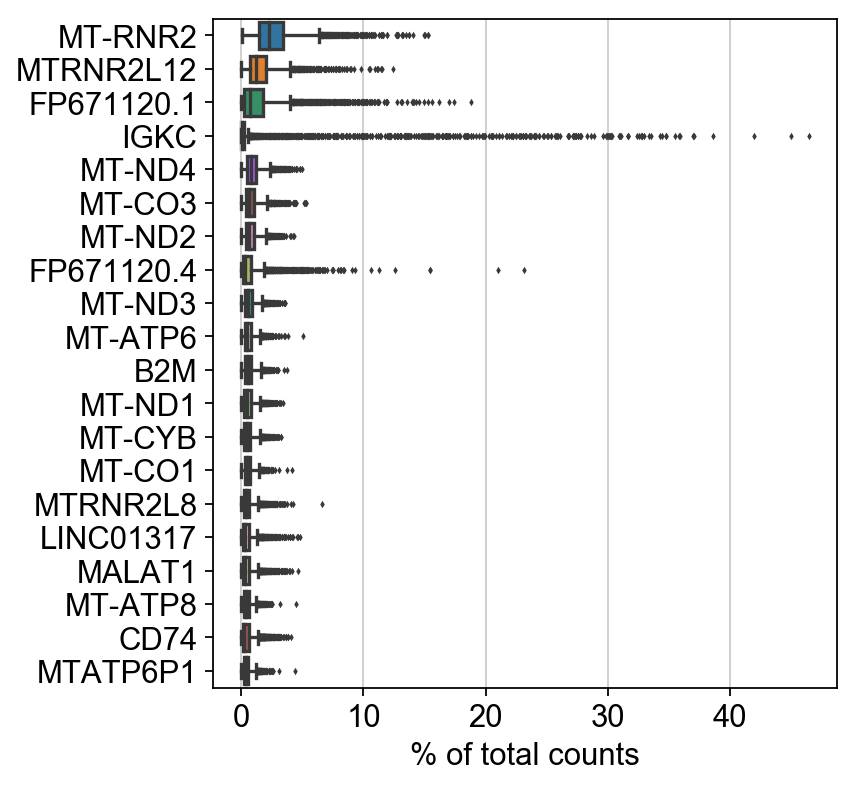

In [19]:
sc.pl.highest_expr_genes(adata, n_top=20)

## Filtering cells and Normalization

In [20]:
scanpy_workflow.filterRegress(adata)

normalizing by total count per cell


Trying to set attribute `.obs` of view, making a copy.


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
regressing out ['n_counts', 'percent_mito']
    finished (0:00:11)


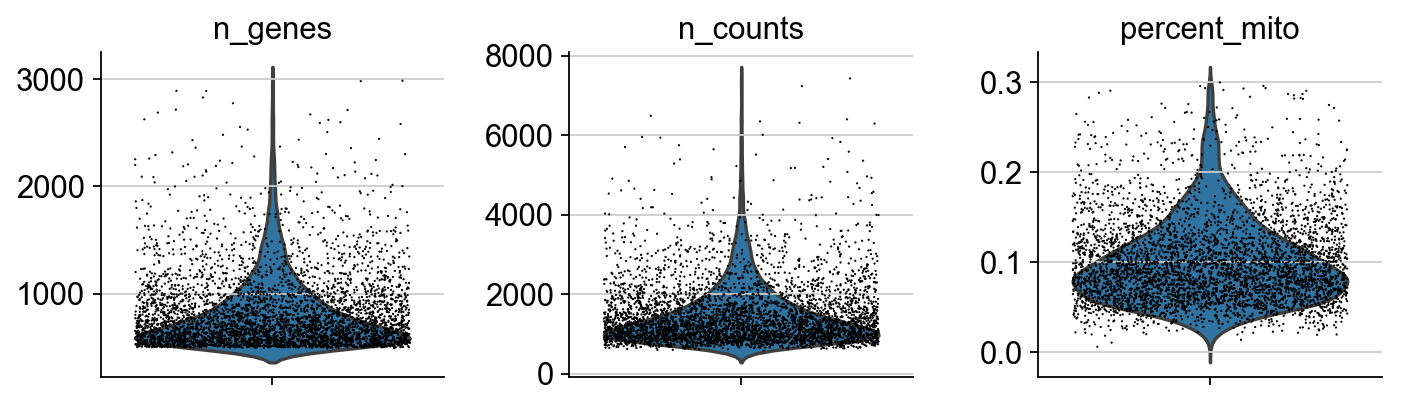

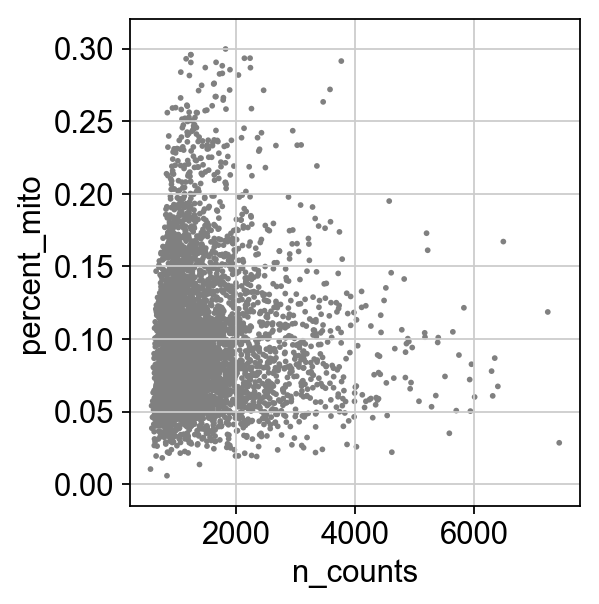

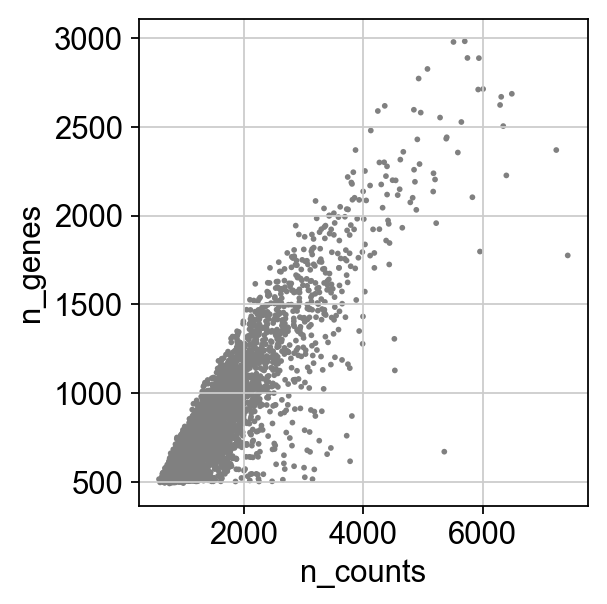

AttributeError: 'DataFrame' object has no attribute 'highly_variable'

In [21]:
scanpy_workflow.summarystatsplots(adata)

## PCA and UMAP

In [22]:
scanpy_workflow.topclustergenes(adata)

computing PCA with n_comps = 50
    finished (0:00:05)
computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
running Louvain clustering


ModuleNotFoundError: No module named 'igraph'

## Visualizing genes

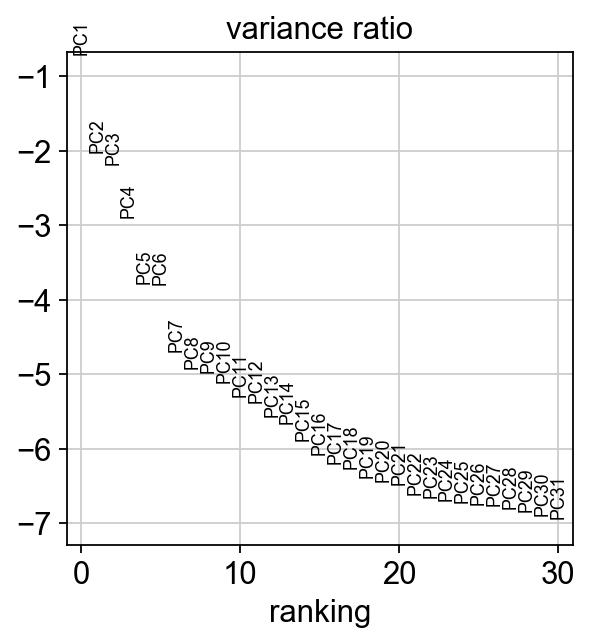

IndexError: Key "louvain" is not valid observation/variable name/index.

<Figure size 1545.6x960 with 0 Axes>

In [23]:
scanpy_workflow.visualizegenes(adata)